# 1. Read and visualise the data

In [22]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Data Preparation

# Data Loading

In [15]:
# Read the dataset
import pandas as pd
countries_df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DATA SCIENCES\Country-data.csv')
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Here, exports, health and imports variables are in percentage of the total GDPP format. So, It is converted into actual value on the basis of GDPP as below since, GDP data and population data is not present the data set.

In [16]:
countries_df['exports'] = countries_df['exports']*countries_df['gdpp']/100
countries_df['imports'] = countries_df['imports']*countries_df['gdpp']/100
countries_df['health'] = countries_df['health']*countries_df['gdpp']/100

Let's read first 5 rows after converting the exports, heath and imports variables

In [17]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [19]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [20]:
countries_df.shape

(167, 10)

# Data Cleaning

In [21]:
countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# As we can see there is no missing data(null,NaN values) in the list


# Exploratory Data Analytics

# Univariate Analysis
We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country

In [24]:
# get lost of numerical values
num_cols = countries_df.columns.drop('country')
num_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

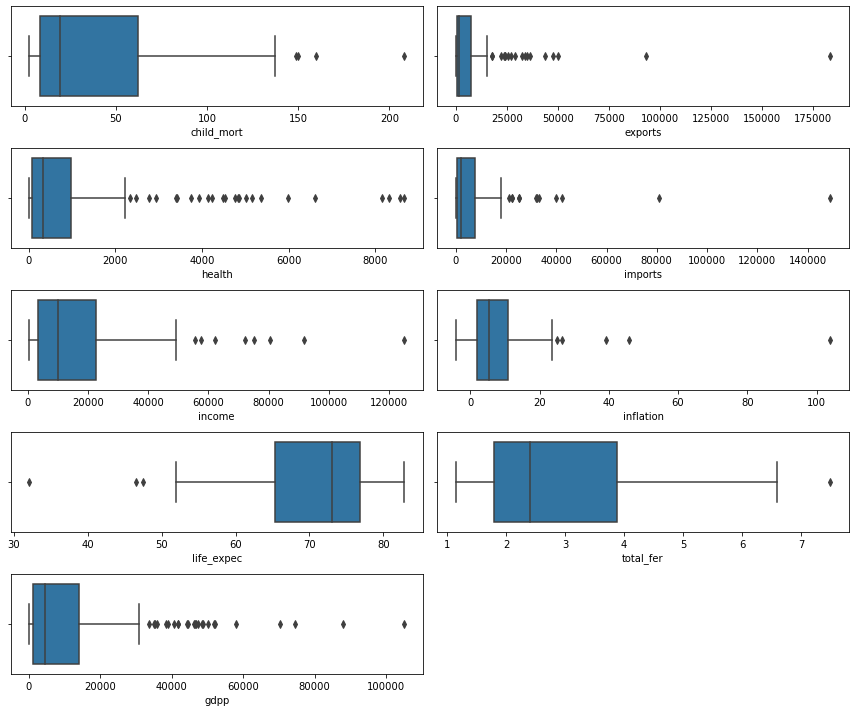

In [25]:
# Plot boxplot of each numerical column
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,10))
i = 1
for x in num_cols:
    plt.subplot(5,2,i)
    sns.boxplot(countries_df[x])
    i = i+1
plt.tight_layout() 
plt.show()

# From the above table, we can see there are some outliers in case of exports,imports,income, gdpp, etc. 

# Outerlier Treatment

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


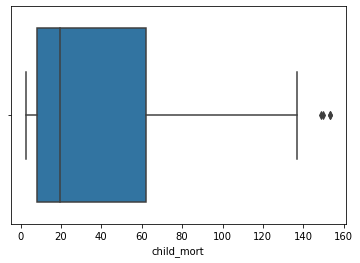

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


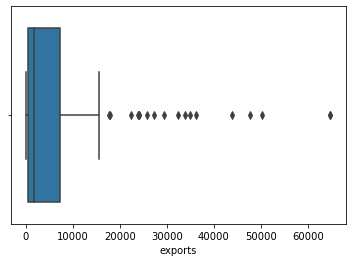

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


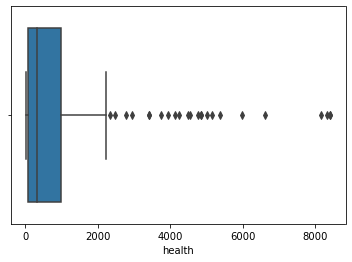

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


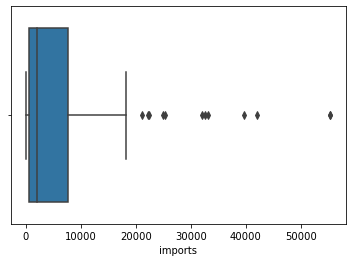

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


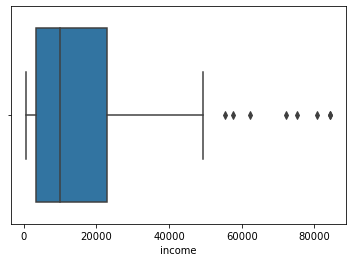

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


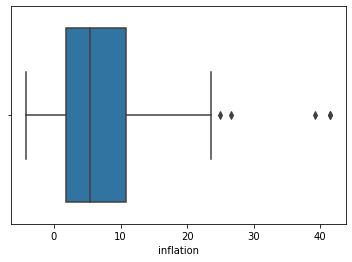

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


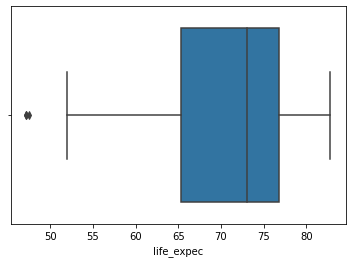

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


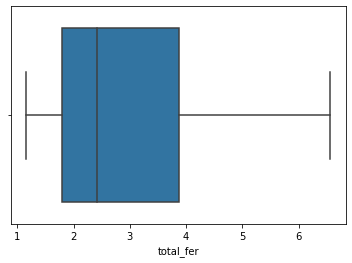

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


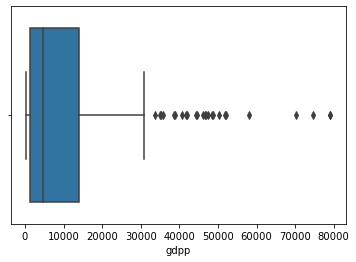

In [26]:
# method to cap the outliers
def outliter_treat(col, low_val, hig_val):
    if low_val is not None:
        Q1 = countries_df[col].quantile(low_val)
        countries_df[col][countries_df[col] <= Q1] = Q1
    if hig_val is not None:
        Q4 = countries_df[col].quantile(hig_val)
        countries_df[col][countries_df[col] >= Q4] = Q4
    sns.boxplot(countries_df[col])
    plt.show()

outliter_treat('child_mort', None, 0.99)
outliter_treat('exports', None, 0.99)
outliter_treat('health', None, 0.99)
outliter_treat('imports', None, 0.99)
outliter_treat('income', None, 0.99)
outliter_treat('inflation', None, 0.99)
outliter_treat('life_expec', 0.01, None)
outliter_treat('total_fer', None, 0.99)
outliter_treat('gdpp', None, 0.99)

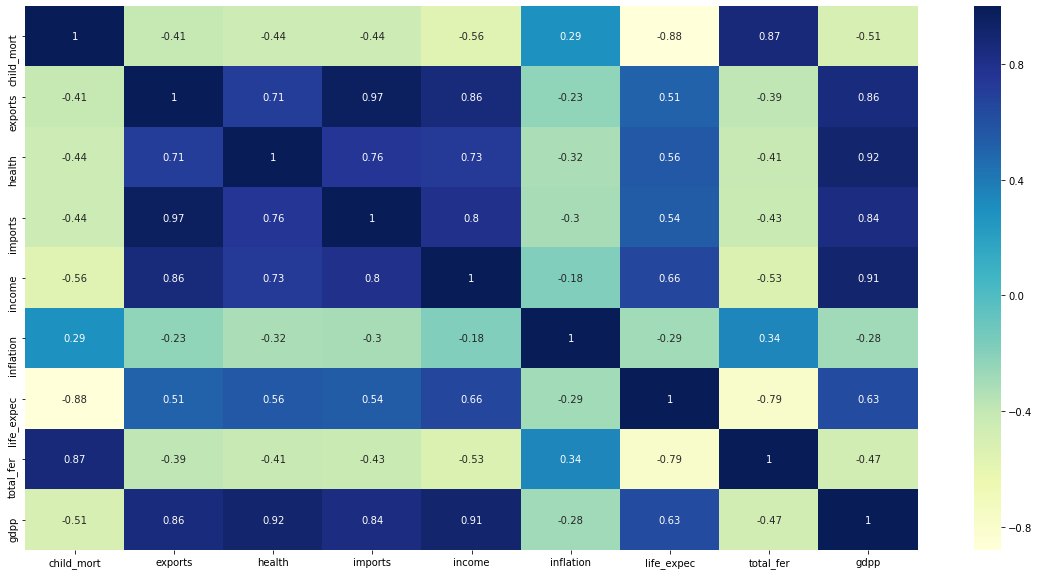

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(countries_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

from above heatmap, we can see exports is highly correlated with import. health, exports, income,imports are highly correlated with gdpp

Scaling the data

In [30]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
# scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(countries_df)

# Clustering

# Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Clustering Process
Let's go ahead and begin with the clustering process i.e first we are calculating the Hopkins statistic

In [31]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(countries_df)

0.8248526689880711

Bases on Hopkins score the data is good for clustering.

K-Means Clustering

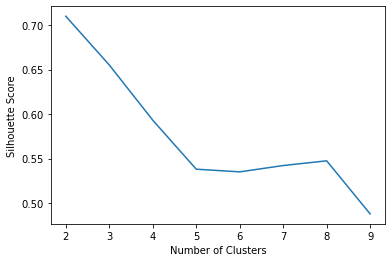

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(countries_df)
    ss.append(silhouette_score(countries_df, kmeans.labels_))
sns.lineplot(x=range(2,10), y=ss)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

# Elbow Curve

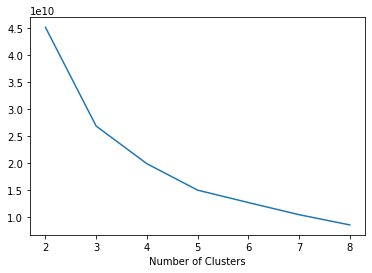

In [45]:
#Plot Elbow Curve Graph
ssd = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=50)
    kmeans.fit(countries_df)
    ssd.append(kmeans.inertia_)
    
sns.lineplot(x=range(2,9), y=ssd)
plt.xlabel('Number of Clusters')
plt.show()

Silhoutte analysis suggests 4 clusters but Elbow curve suggests 3 clusters. Even in Silhoutte analysis 3 has a good score so lets go with 3 clusters

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(countries_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [51]:
#Merge Clusters with original data frame
clusters_df = pd.DataFrame(pd.Series(kmeans.labels_), columns=['cluster'])
original_df = pd.concat([countries_df, cluster_df], axis=1)
original_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


# Plots based on clusters:

<function matplotlib.pyplot.show(*args, **kw)>

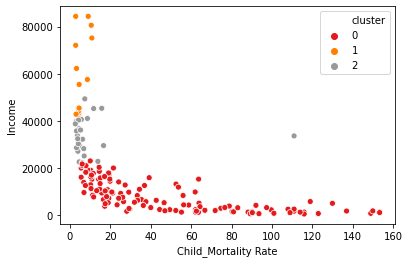

In [53]:
# Plotting child mortality rate vs income
sns.scatterplot(x='child_mort', y='income', hue= 'cluster', data=original_df, legend='full', palette='Set1')
plt.xlabel('Child_Mortality Rate')
plt.ylabel('Income')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

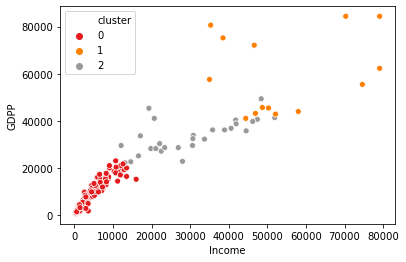

In [54]:
# Plotting gdpp rate vs income
sns.scatterplot(x='gdpp', y='income', hue= 'cluster', data=original_df, legend='full', palette='Set1')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

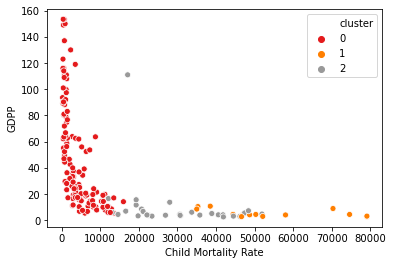

In [55]:
# Plotting gdpp rate vs child mortality rate 
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster', data=original_df, legend='full', palette='Set1')
plt.xlabel('Child Mortality Rate')
plt.ylabel('GDPP')
plt.show

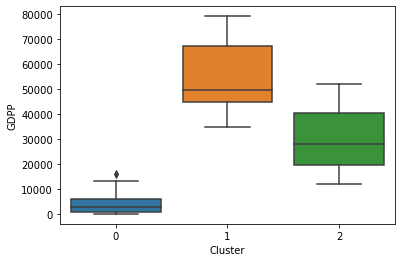

In [57]:
# comparing gdpp among clusters
sns.boxplot(x='cluster', y='gdpp', data=original_df)
plt.ylabel('GDPP')
plt.xlabel('Cluster')
plt.show()

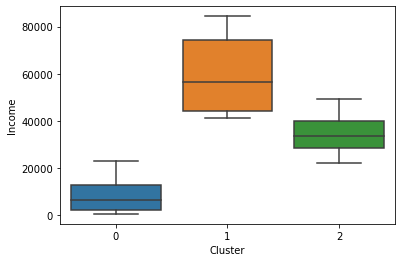

In [61]:
# comparing income among clusters
sns.boxplot(x='cluster', y='income', data=original_df)
plt.ylabel('Income')
plt.xlabel('Cluster')
plt.show()

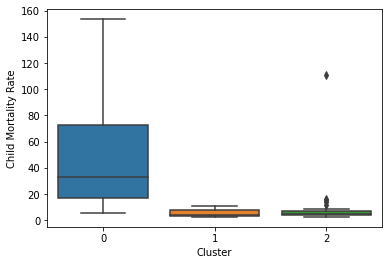

In [62]:
# comparing child mortality rate among clusters
sns.boxplot(x='cluster', y='child_mort', data=original_df)
plt.ylabel('Child Mortality Rate')
plt.xlabel('Cluster')
plt.show() 

By all these graphs we can see countries in cluster 1 need the more help

In [63]:
# List of countries in cluster 1
original_df['country']=country_col
original_df.loc[original_df.cluster==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
8,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,1,Austria
15,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1,Belgium
23,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,1,Brunei
44,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1,Denmark
73,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,1,Ireland
82,10.8,25679.50,1012.5500,11704.00,75200.0,11.200,78.2,2.21,38500.0,1,Kuwait
91,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,1,Luxembourg
110,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,1,Netherlands
114,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,1,Norway
123,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,1,Qatar


# Hierarchical Clustering

# Single Linkage

In [65]:
# Import required modules for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

In [66]:
countries_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


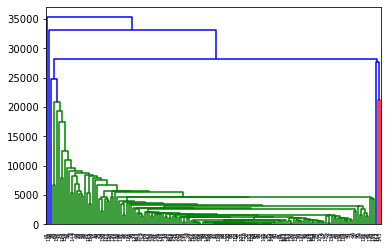

In [67]:
#perform Single linkage and plot dendrogram
mergings = linkage(countries_df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

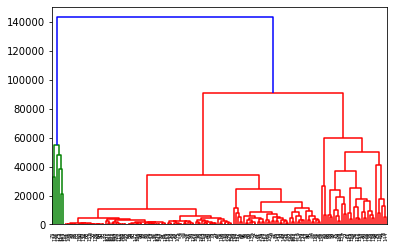

In [68]:
#complete linkage
mergings = linkage(countries_df, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [69]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Merge the cluster with original data frames
original_df['hier_cluster'] = cluster_labels
pc_df['hier_cluster'] = cluster_labels

In [71]:
# Merge the cluster with original data frames
original_df['hier_cluster'] = cluster_labels
countries_df['hier_cluster'] = cluster_labels

In [72]:
countries_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [73]:
# Count of countries in each clusters
original_df['hier_cluster'].value_counts()

0    128
1     33
2      6
Name: hier_cluster, dtype: int64

Visual the cluster on various axis:

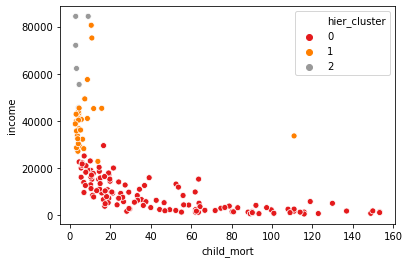

In [74]:
# ploting child mortality vs income
sns.scatterplot(x='child_mort', y='income', hue='hier_cluster', data=original_df, legend='full', palette='Set1')
plt.show()

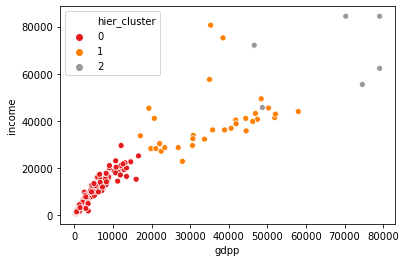

In [75]:
# ploting gdpp vs income
sns.scatterplot(x='gdpp', y='income', hue='hier_cluster', data=original_df, legend='full', palette='Set1')
plt.show()

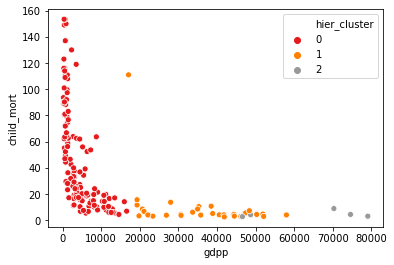

In [76]:
# plotting gdpp vs child mortality
sns.scatterplot(x='gdpp', y= 'child_mort',hue= 'hier_cluster', data= original_df, legend='full', palette= 'Set1')
plt.show()


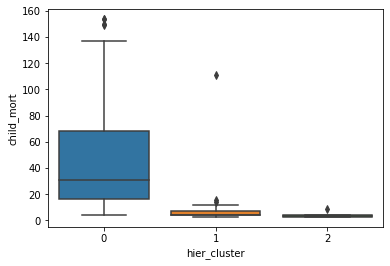

In [77]:
# comparing child mortality among clusters
sns.boxplot(x='hier_cluster', y='child_mort', data=original_df)
plt.show()

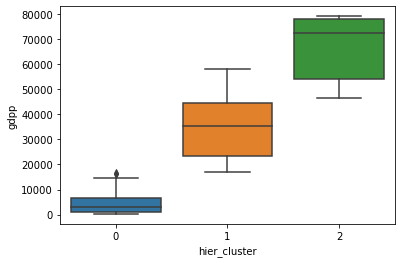

In [78]:
# comparing gdpp among clusters
sns.boxplot(x='hier_cluster', y='gdpp', data= original_df)
plt.show()

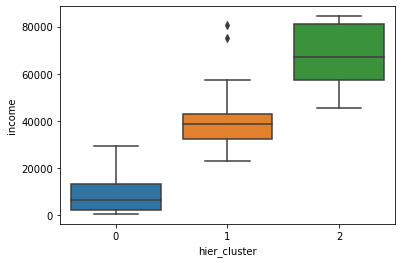

In [79]:
# comparing income among clusters
sns.boxplot(x='hier_cluster', y= 'income', data= original_df)
plt.show()

Comparing Countries in Clusters which needs help

In [80]:
# sorting based on gdpp
original_df.loc[original_df.cluster==1,['country', 'gdpp']].sort_values(by='gdpp').head(10)

,country,gdpp
157,United Arab Emirates,35000.0
23,Brunei,35300.0
82,Kuwait,38500.0
15,Belgium,44400.0
133,Singapore,46600.0
8,Austria,46900.0
73,Ireland,48700.0
110,Netherlands,50300.0
144,Sweden,52100.0
44,Denmark,58000.0


In [81]:
# sorting based on income
original_df.loc[original_df.cluster==1, ['country', 'income']].sort_values(by= 'income').head(10)

,country,income
15,Belgium,41100.0
144,Sweden,42900.0
8,Austria,43200.0
44,Denmark,44000.0
110,Netherlands,45500.0
73,Ireland,45700.0
145,Switzerland,55500.0
157,United Arab Emirates,57600.0
114,Norway,62300.0
133,Singapore,72100.0


In [83]:
# sorting based on child mortality rate
original_df.loc[original_df.cluster==1, ['country', 'child_mort']].sort_values(by= 'child_mort', ascending='False').head(10)

,country,child_mort
91,Luxembourg,2.8
133,Singapore,2.8
144,Sweden,3.0
114,Norway,3.2
44,Denmark,4.1
73,Ireland,4.2
8,Austria,4.3
15,Belgium,4.5
110,Netherlands,4.5
145,Switzerland,4.5


# Final Result

Looking at the data , 5 countries which need the help most are:

1. Luxembourg
2. Singapore
3. Sweden
4. Belgium
5. United Arab Emirates